---
# Experto Big Data UNAV 2018 - Notebook 11 - Visualizacion
---

In [2]:
import seaborn as sn

En esta clase, investigaremos métodos para la exploración de datos utilizando técnicas de visualización. Utilizaremos varios paquetes de Python para crear las visualizaciones, matplotlib, plotting con Pandas y seaborn.
Para estas lecciones, trabajaremos con un conjunto de datos que contiene los precios y las características de varios automóviles. El objetivo final es construir un modelo para predecir el precio de un automóvil a partir de sus características. El dataset  viene del  [Repositorio de Aprendizaje Automático de la Universidad Irving en California](https://archive.ics.uci.edu/ml/datasets/Automobile).

1. symboling: -3, -2, -1, 0, 1, 2, 3. 
2. normalized-losses: continuous from 65 to 256. 
3. make: 
alfa-romero, audi, bmw, chevrolet, dodge, honda, 
isuzu, jaguar, mazda, mercedes-benz, mercury, 
mitsubishi, nissan, peugot, plymouth, porsche, 
renault, saab, subaru, toyota, volkswagen, volvo 

4. fuel-type: diesel, gas. 
5. aspiration: std, turbo. 
6. num-of-doors: four, two. 
7. body-style: hardtop, wagon, sedan, hatchback, convertible. 
8. drive-wheels: 4wd, fwd, rwd. 
9. engine-location: front, rear. 
10. wheel-base: continuous from 86.6 120.9. 
11. length: continuous from 141.1 to 208.1. 
12. width: continuous from 60.3 to 72.3. 
13. height: continuous from 47.8 to 59.8. 
14. curb-weight: continuous from 1488 to 4066. 
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. num-of-cylinders: eight, five, four, six, three, twelve, two. 
17. engine-size: continuous from 61 to 326. 
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. bore: continuous from 2.54 to 3.94. 
20. stroke: continuous from 2.07 to 4.17. 
21. compression-ratio: continuous from 7 to 23. 
22. horsepower: continuous from 48 to 288. 
23. peak-rpm: continuous from 4150 to 6600. 
24. city-mpg: continuous from 13 to 49. 
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

Para ejecutar este Notebook, necesitas el paquete de gráficos de Seaborn. Deberás instalar Seaborn ya que no está en la distribución de Anaconda. Desde un símbolo un teminal de simbolo de sistema (puede ser que tengas que hacerlo des el directorio donde instalaste Anaconda en Windows), escribe el siguiente comando. Si no ocurre ningún error, habrás instalado Seaborn.

`` pip install seaborn``

o

`` conda install seaborn``  #Es recomendable usar primero conda, y si no, se usa lo de pip.

Puedes encontrar más información sobre la instalación de ```seaborn``` en la página [Instalación de Seaborn](http://seaborn.pydata.org/installing.html).

El concepto clave en el análisis exploratorio de datos (E.D.A.: *Exploratory data analysis*) o exploración visual de datos reside en comprender las relaciones en el conjunto de datos que vamos a estudiar. Utilizando específicamente la visualización cuando te acercas a un nuevo conjunto de datos, puedes:

- Explorar conjuntos de datos complejos, usando la visualización para desarrollar la comprensión de sus relaciones.
- Utilizar diferentes tipos de gráficos para crear vistas múltiples de datos y resaltar diferentes aspectos de sus relaciones.
- Utilizar el *plotting* para proyectar múltiples dimensiones.

En estos ejercicios, usarás el paquete ```matplotlib```, ```pandas```  y ```Seaborn```.


## Recursos

En este tutorial, trabajaremos con dos potentes paquetes de Python, Pandas y Seaborn. Ambos paquetes tienen una extensa documentación en línea. Existe un extenso tutorial sobre [** Visualizacion con Pandas **](http://pandas.pydata.org/pandas-docs/version/0.18.0/visualization.html). El [** tutorial de Seaborn **](https://stanford.edu/~mwaskom/software/seaborn/tutorial.html) contiene muchos ejemplos de visualización de datos. El sitio web de matplotlib tiene además [** recursos para aprender a plottear con las herramientas de Python **](http://matplotlib.org/resources/index.html).


## Cargar y examinar el conjunto de datos

La función que se muestra en la celda a continuación carga los datos del archivo .csv. Se realiza una limpieza mínima en los datos. Las filas con missing values  se eliminan y algunas columnas se convierten de cadenas que contienen números a datos numéricos.

Ejecuta el código en esta celda para cargar los datos. ** ¡Asegúrate de tener el archivo .csv en tu directorio de trabajo! **

In [3]:
import pandas as pd
import numpy as np

def read_auto_data(fileName = "Automobile_price_data.csv"):
    'Funcion que carga el dataset de precios de automovil'
 
    ## leemos el csv
    auto_prices = pd.read_csv(fileName)
    
    ## nos cargamos algunas filas con missing values
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    for column in cols:
        auto_prices.loc[auto_prices[column] == '?', column] = np.nan
    auto_prices.dropna(axis = 0, inplace = True)

    ## convertimos columnas a valor numerico
    for column in cols:
        auto_prices[column] = pd.to_numeric(auto_prices[column])
    # auto_prices[cols] = auto_prices[cols].as_type(int64)
        
    return auto_prices
auto_prices = read_auto_data()

Usa el metodo de Pandas ``head`` para explorar las primeras filas del dataset.

In [4]:
auto_prices.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Puedes ver que hay tipos de variables numéricas y de tipo cadena (categóricas). Como siguiente paso, podemos examinar algunas estadísticas de resumen de las columnas numéricas usando el método Pandas ``describe``. Ten en cuenta que las unidades de medida son americanas, no europeas.

In [5]:
auto_prices.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,1.230612,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


## Tipos basicos de graficos

Estos son los tipos de graficos que suelen ser utilizados para explorar datos.

- **Scatter plot**
- **Line plots**
- **Bar plots**
- **Histogramas**
- **Box plots**
- **Kernel Density Estimation Plots**
- **Violin plots**

### Scatter plots

Los scatter plots muestran la relacion entre dos varialles en forma de puntos en el grafico. En terminos simples los valores de una variable x se plotean en el eje horizontal frente a los valores de otra variable y en el eje vertical.

#### Scatter plots with Matplotlib

Matplotlib es la base de la mayoria de paquetes de graficacion que existen en Python. Por ello vamos estudiar como funciona para poder controlar nuestros graficos.

Empecemos haciendo un scatter plot. Para ello tenemos que:


- Importar Matplotlib.pyplot
- Usar el metodo plot.
- Especificar las variables a plotear en los ejes x e y.
- Especificar los parametros para el graficado. Por ejemplo si queremos puntos rojos the indicaremos 'ro' como parametro. Si no expecificamos nada ploteara una linea que es el ploteado por defecto.


***
**Nota:** El comando magico Ipython `%matplotlib inline` permite mostrar graficos en el Notebook. Si no lo incluimos los graficos nos se mostraran embebidos en el Notebook.
***

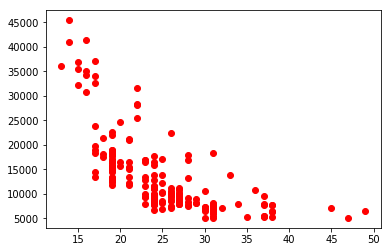

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(auto_prices['city-mpg'], auto_prices['price'], 'ro') #r indica red y o indica punto, esto se modifica

Interesante!. Sin embargo estamos limitados por varios aspectos. Puedes detectar algunos de los problemas de este plot?.

#### Scatter plots con Pandas

Si bien podemos crear la mayoría de las visualizaciones usando Matplotlib, con suficiente código, es posible que deseemos un enfoque más simple si los datos están en una DataFrame  de de Pandas. El paquete Pandas contiene una serie de métodos de ploteado útiles que operan sobre DataFrames. Para plotear datos con Pandas:

- Usa el método de ploteado, especificando el argumento ``kind``, o usa un método de ploteado específico del gráfico.
- Especifica las columnas con los valores para los ejes ``x`` e ``y``.

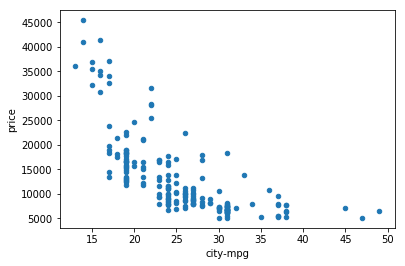

In [7]:
# millas por galon en ciudad vs precio
auto_prices.plot(kind = 'scatter', x = 'city-mpg', y = 'price')

El plot de Pandas provee algunas mejoras respecto al plot basico de Matplotlib. Por ejemplo, los ejes estan mejor escalados y se generan los nombres de los ejes.

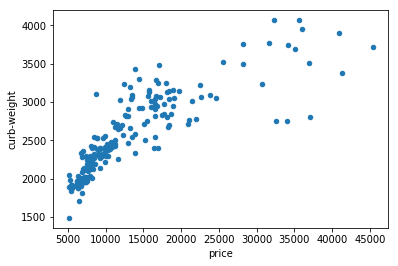

In [8]:
# precio vs peso del vehiculo
auto_prices.plot(kind = 'scatter', x = 'price', y = 'curb-weight')

Nuestra receta básica funcionó, pero no nos da mucho control sobre el resultado. Podemos aprovechar el hecho de que los métodos de ploteo de Pandas se basan en matplotlib. Por lo tanto, podemos especificar una figura y uno o más ejes dentro de esa figura. Entonces, podemos controlar muchos atributos de ploteado una vez que hayamos especificado los ejes. Nuestra receta mejorada se ve así:

- Especifica una figura, incluido un tamaño.
- Define uno o más ejes dentro de la figura.
- Usa el método de ploteado de pandas de elección. Asegúrate de especificar el eje que estás utilizando.
- Utiliza métodos en los ejes para controlar y agregar atributos como títulos y etiquetas de ejes.

Text(0,0.5,'Auto Price')

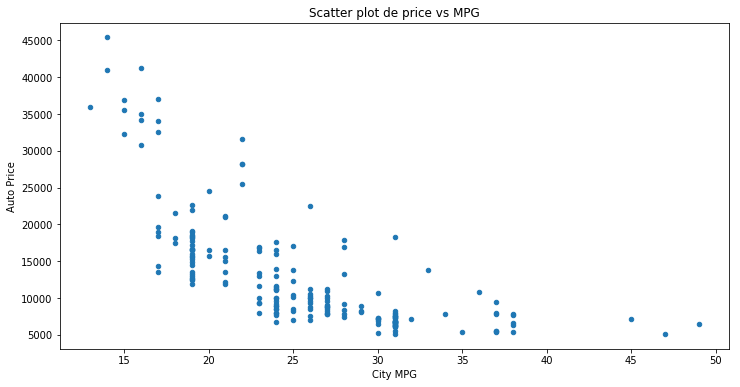

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6)) # definimos area de plotting
ax = fig.gca() # define axis                   
auto_prices.plot(kind = 'scatter', x = 'city-mpg', y = 'price', ax = ax)
ax.set_title('Scatter plot de price vs MPG') # titulo del plot
ax.set_xlabel('City MPG') # texto para x axis
ax.set_ylabel('Auto Price')# texto para y axis

**FINDING:** Ya podemos ver nuestro primer finding. En la gráfica anterior, podemos ver que los autos más caros tienen menor eficiencia de combustible, mientras que los autos relativamente económicos consumen menos gasolina

Text(0,0.5,'Weight')

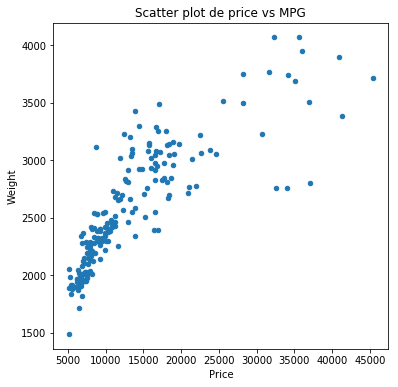

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 6)) # definimos area de plotting
ax = fig.gca() # define axis                   
auto_prices.plot(kind = 'scatter', x = 'price', y = 'curb-weight', ax = ax)
ax.set_title('Scatter plot de price vs MPG') # titulo del plot
ax.set_xlabel('Price') # texto para x axis
ax.set_ylabel('Weight')# texto para y axis

**FINDING:** Los coches mas caros tienden a pesar mas.

### Line plots

Los line plots son similares a los gráficos de puntos salvo que los puntos discretos están conectados por líneas.

Vamos a crear un DataFrame con unan relacion simple entre x e y.

In [17]:
import pandas as pd
x = list(range(100))#una lista de 100 elemenotos
y = [z * z for z in range(100)]  #los elementos de  al cuadrado
df = pd.DataFrame({'x':x, 'y':y})

Aplicamos lo que hemos visto para plotear x vs y con un grafico de linea

Text(0,0.5,'x^2')

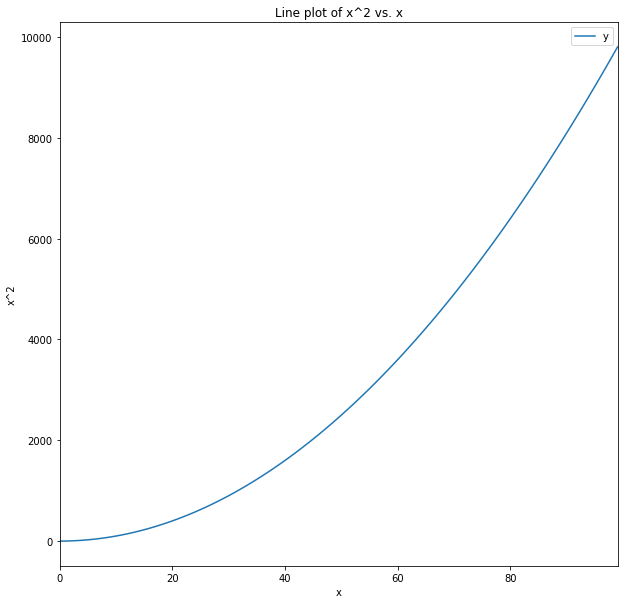

In [18]:
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis                   
df.plot(x = 'x', y = 'y', ax = ax) ## line is the default plot type
ax.set_title('Line plot of x^2 vs. x') # Give the plot a main title
ax.set_xlabel('x') # Set text for the x axis
ax.set_ylabel('x^2')# Set text for y axis

### Bar plots

Los gráficos de barras se utilizan para mostrar los recuentos de valores únicos de una variable categórica (entre otras cosas). La altura de la barra representa el recuento para cada categoría única de la variable.

Es poco probable que en el DataFrame tengamos un conteo por categoría de una variable. Por lo tanto, el primer paso para hacer un bar plot es calcular las frecuencias. Afortunadamente, pandas tiene un método ``value_counts``. 

In [19]:
# encuentra la frecuencia de valores de los modelos de coche
counts = auto_prices['make'].value_counts()

Puedes ver la lista ordenada de frecuenias ordenada de mayor a menor.  Ahora, podemos crear el bar plot utilizando la variable ``counts``.

Text(0,0.5,'Number of autos')

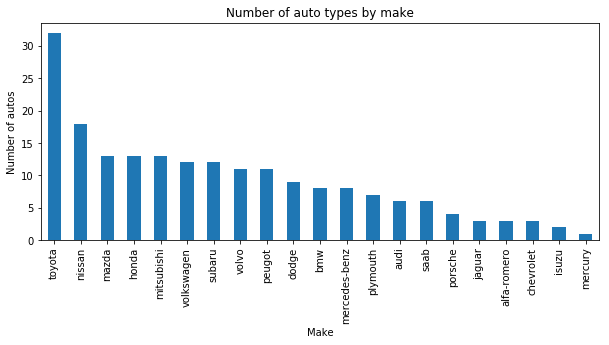

In [23]:
fig = plt.figure(figsize=(10,4)) # define plot area
ax = fig.gca() # define axis    
counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of auto types by make') # Give the plot a main title
ax.set_xlabel('Make') # Set text for the x axis
ax.set_ylabel('Number of autos')# Set text for y axis

El bar plot te muestra que fabricantes de coches tienen mas modelos. Aquellos mas especializados hacen menos modelos.

### Histogramas

Los histogramas están relacionados con los bar plots. Los histogramas se usan para representar variables numéricas. Mientras que, un gráfico de barras muestra los recuentos de categorías únicas, un histograma muestra la cantidad de datos con valores dentro de un bin. Los bines dividen los valores de la variable en segmentos iguales. El eje vertical del histograma muestra el recuento de valores de datos dentro de cada bin. El siguiente código como crear un histograma de la variable ``motor-size``.

Text(0,0.5,'Number of autos')

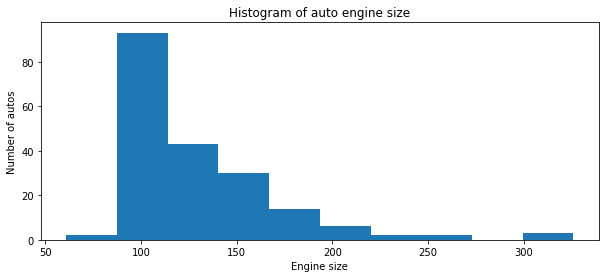

In [22]:
fig = plt.figure(figsize=(10,4)) # define plot area
ax = fig.gca() # define axis    
auto_prices['engine-size'].plot.hist(ax = ax) # Use the plot.hist method on subset of the data frame
ax.set_title('Histogram of auto engine size') # Give the plot a main title
ax.set_xlabel('Engine size') # Set text for the x axis
ax.set_ylabel('Number of autos')# Set text for y axis

**FINDING:** El histograma muestra que la distribución del tamaño del motor está sesgada hacia motores pequeños. También hay algunos coches con motores muy grandes, que aparecen como outliers.



### Boxplots

Los diagramas de caja son otra forma de visualizar la distribución de los valores de los datos. A este respecto, los diagramas de caja son comparables a los histogramas, pero su presentación es bastante diferente.

En un diagrama de caja,la mediana se muestra con una barra oscura. Los dos cuartiles interiores de valores de datos están contenidos dentro de la 'caja'. Los "wiskers" encierran la mayoría de los datos (hasta +/- 2.5 * rango intercuartil). Los outliers se muestran mediante símbolos por los wiskers.

Se pueden apilar barios boxplots a lo largo de un eje para comparar. Se agrupan los datos mediante 'groupby', y los diagramas de caja para cada grupo se apilan uno al lado del otro. De esta forma, el diagrama de caja permite mostrar dos dimensiones del conjunto de datos.

/Users/laura/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0,0.5,'Engine size')

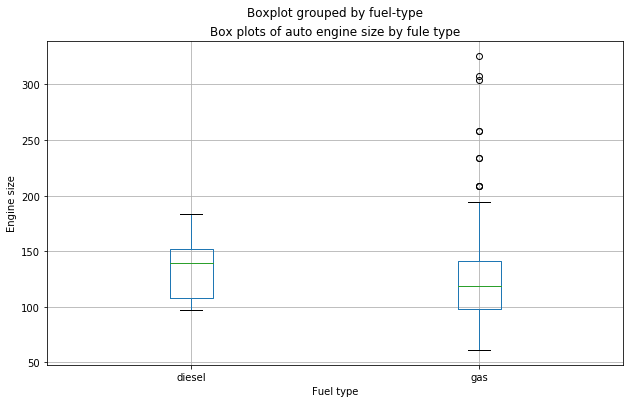

In [25]:
fig = plt.figure(figsize=(10,6)) # define plot area
ax = fig.gca() # define axis    
auto_prices[['engine-size','fuel-type']].boxplot(by = 'fuel-type', ax = ax) # Use the plot.bar method on the new data frame
ax.set_title('Box plots of auto engine size by fule type') # Give the plot a main title
ax.set_xlabel('Fuel type') # Set text for the x axis
ax.set_ylabel('Engine size')# Set text for y axis
#Nos da la distribucion de cohes que consumen diesel y coches que consumen gas

Examina la gráfica anterior y observa las diferencias en la distribución del tamaño del motor por tipo de combustible. Existe una superposición considerable en el rango intercuartil (el rango dentro de las cajas), con coches de gasolina que tienen generalmente motores más pequeños. El tamaño medio del motor para los automóviles gasolina es notablemente menor que para los automóviles diesel. Sin embargo, la gama de tamaños de motores para automóviles a gasolina es mayor, incluidos algunos outliers. 

### Kernel Density Plots e instalación d Seaborn

Hasta ahora hemos estado trabajando exclusivamente con los métodos de ploteado de Matplotlib y Pandas. Ahora comenzaremos a trabajar con el paquete Seaborn. Seaborn es un paquete de Python más nuevo que abstrae los gráficos matplotlib. Seaborn implementa algunos tipos de gráficos de mas modernos.

Los kernel density plots son similares en concepto a un histograma. Un kernel density plot muestra los valores de un histograma de manera suavizada en forma curva.
 
 El código de la siguiente celda realizamos:
 
 - Importar el paquete Seaborn,
 - Establecer un estilo de grid para el ploteado.
 - Definimos el tipo de ploteado con ``kdeplot`` usando la columna engine-size como argumento.
 
 ****
 ** Nota: ** Dependiendo de su plataforma y versiones de Numpy, es posible que vea un mensaje de advertencia. Puedes ignorar esta advertencia de forma segura.
 ****

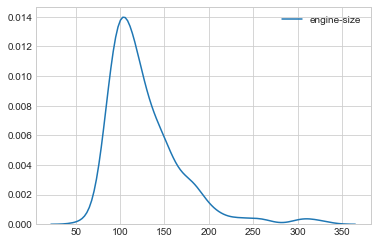

In [26]:
import seaborn as sns
sns.set_style("whitegrid")
sns.kdeplot(auto_prices['engine-size'])

Los resultados del KDE son similares a los que observamos con el histograma del tamaño del motor. El tamaño del motor está sesgado hacia el tamaño pequeño, y hay outliers de algunos automóviles con motores grandes claramente visibles.

Como hicimos con los plots de pandas, controlamos las propiedades de una trama de Seaborn especificando los ejes. El código en la celda de abajo extiende nuestro codigo para el ploteado de Seaborn:

- Define una figura.
- Define uno o más ejes en la figura.
- Establece un estilo de grid para el plot.
- Define el tipo de plot y las columnas que se dibujarán.
- Usa métodos en los ejes para controlar atributos como título y etiquetas de ejes.

Text(0,0.5,'Density')

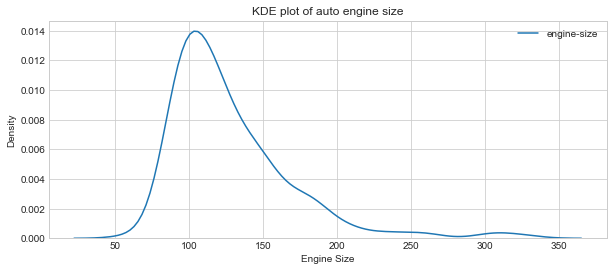

In [27]:
fig = plt.figure(figsize=(10,4)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.kdeplot(auto_prices['engine-size'], ax = ax)
ax.set_title('KDE plot of auto engine size') # Give the plot a main title
ax.set_xlabel('Engine Size') # Set text for the x axis
ax.set_ylabel('Density')# Set text for y axis

También podemos crear un plot bidimensional de KDE. El siguiente código crea un gráfico de kde bidimensional de precio y tamaño del motor siguiendo la misma forma. Ten en cuenta que todo lo que tenemos que hacer es especificar otra columna del DataFrame para la segunda dimensión.

/Users/laura/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:630: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  x, y = data.T


Text(0,0.5,'Price')

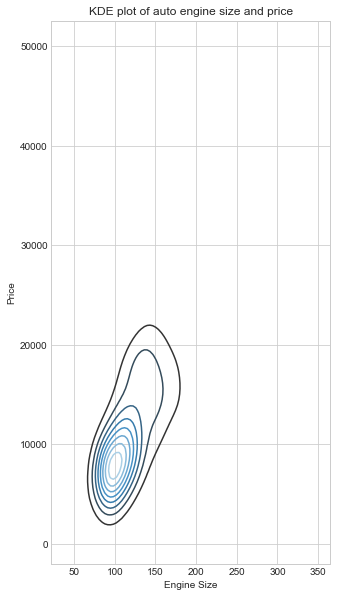

In [28]:
fig = plt.figure(figsize=(5,10)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.kdeplot(auto_prices[['engine-size', 'price']], ax = ax, cmap="Blues_d")
ax.set_title('KDE plot of auto engine size and price') # Give the plot a main title
ax.set_xlabel('Engine Size') # Set text for the x axis
ax.set_ylabel('Price')# Set text for y axis

### Violin plots

Ahora, usaremos Seaborn para crear un plot de violín. Una gráfica de violín combina los atributos de las gráficas de caja y un KDE. Al igual que un diagrama de caja, los trazados de violín se pueden apilar, con un grupo por operación. Además, el diagrama del violín proporciona una estimación de la densidad del núcleo para cada grupo. Al igual que con el diagrama de caja, los gráficos de violín permiten mostrar dos dimensiones de los datos.

El método ``sns.violinplot`` tiene más argumentos que el método kdeplot.

- Las columnas utilizadas para el plot se establecen con los argumentos ``x`` e ``y``.
- La columna ``x`` es el grupo por variable.
- El argumento ``data`` especifica un dataframe  o un array numpy.

Text(0,0.5,'Engine size')

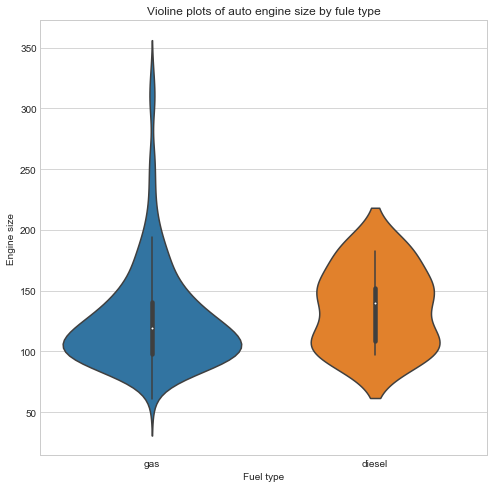

In [29]:
fig = plt.figure(figsize=(8,8)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'fuel-type', y = 'engine-size', data = auto_prices, ax = ax)
ax.set_title('Violine plots of auto engine size by fule type') # Give the plot a main title
ax.set_xlabel('Fuel type') # Set text for the x axis
ax.set_ylabel('Engine size')# Set text for y axis

Las diferencias en la distribución del tamaño de los motores entre los automóviles de gasolina y diesel son claramente visibles en los plot de violín. Podemos confirmar que el tamaño del motor de los automóviles de gasolina se concentra en el tamaño pequeño, pero con un rango general más amplio. Hay algunos coches de gasolina con motores de tamaño muy pequeño y varios autos que aparecen como outliers con motores grandes. La distribución de los tamaños del motor diesel es más uniforme.

## Visualización de múltiples dimensiones

Ahora hemos explorado algunos tipos de plots básicos. Solo hemos analizado plots para una o dos columnas de datos. Por lo tanto, nos hemos limitado a la visualización de solo dos dimensiones de nuestro conjunto de datos.

Ahora, usaremos la estética de la gráfica para ver las dimensiones adicionales del conjunto de datos. Estos parametros te permiten proyectar dimensiones adicionales en una superficie de dibujado bidimensional. Además, la elección cuidadosa de la estética del ploteado puede resaltar ciertos aspectos de un conjunto de datos que estemos explorando.

Hay muchas posibilidades que uno puede usar para la visualización. Los ejemplos específicos con los que trabajaremos aquí incluyen:

- Color
- Transparencia
- Tamaño
- Forma de marcador
- Estética específica del tipo de plot

### Color

El color se puede usar para ver una dimensión adicional en un scatter plot. Se puede mostrar una variable categórica usando diferentes colores para las diferentes categorías.

*****
**Nota:** Asegúrate de utilizar una paleta con colores distintivos para cada categoría. Demasiadas categorías con colores similares son difíciles de ver e imposibles de interpretar.
****

El código de abajo usa el argumento ``hue`` para agregar una tercera dimensión, ``fuel-type`` a un scatter plot. También se especifica una paleta de colores.

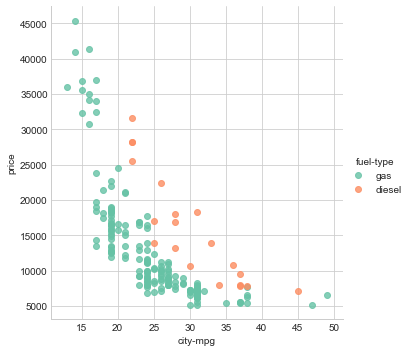

In [30]:
sns.lmplot(x = 'city-mpg', y = 'price', 
           data = auto_prices, 
           hue = "fuel-type", 
           palette="Set2", fit_reg = False)     

En la gráfica anterior, podemos ver que un coche diesel es generalmente más caro cuanto menos consume. También podemos ver que todos los coches menos eficientes y más caros tienen motores de gasolina.
Podemos obtener un mayor control sobre la estética del plot. El código en la función que se muestra a continuación divide los datos en subconjuntos y los plotea con diferente estética en el mismo conjunto de ejes.

'Done'

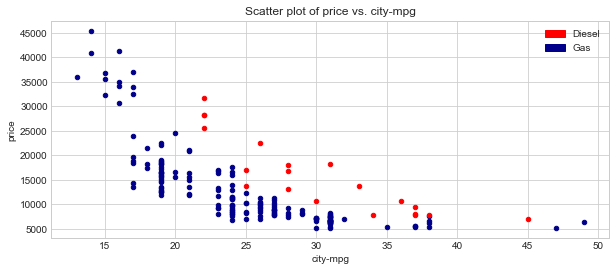

In [32]:
def auto_color(df, plot_cols):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(10, 4))
        ax = fig.gca()
        temp1 = df.loc[df['fuel-type'] == 'gas']       
        temp2 = df.loc[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue')                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red') 
    ax.set_title('Scatter plot of price vs. ' + col)
    red_patch = mpatches.Patch(color='Red', label='Diesel')   
    blue_patch = mpatches.Patch(color='DarkBlue', label='Gas')
    plt.legend(handles=[red_patch, blue_patch])
    return 'Done'
auto_color(auto_prices, ['city-mpg'])

El scatter plot anterior es similar al que vimos al principio solo que los colores son mas distintivos. Se puede lograr un efecto similar con los diagramas de Seaborn eligiendo otra paleta de colores.

### Transparencia

En el scatter plot anterior, observa que hay áreas en el plot con densas agrupaciones de puntos. En particular, hay puntos superpuestos para los automóviles a gasolina con city-mpg entre 19 y 31.

Debido al **efecto de sobre-ploteado** es difícil ver cuántos automóviles están representados en algunas regiones del dibujo. La transparencia, es una propiedad útil para superar el exceso de ploteado. La transparencia se define en una escala de 0 (completamente transparente o invisible) a 1 (opaca). Al elegir valores razonables de transparencia, puedes hacerte una idea de cuántos puntos se agrupan en un área pequeña de un plot.

Al código anterior se ha agregado el argumento de transparencia, ``alpha``.

['city-mpg']

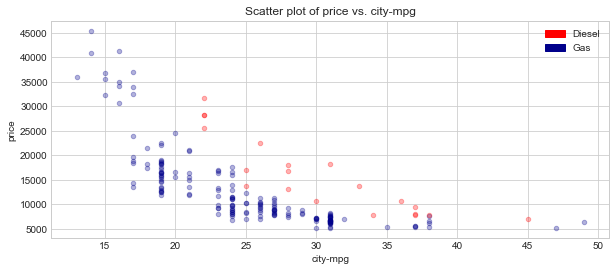

In [34]:
def auto_color(df, plot_cols):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(10, 4))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue', alpha = 0.3)                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red', alpha = 0.3) 
        ax.set_title('Scatter plot of price vs. ' + col)
        red_patch = mpatches.Patch(color='Red', label='Diesel')   
        blue_patch = mpatches.Patch(color='DarkBlue', label='Gas')
        plt.legend(handles=[red_patch, blue_patch])
    return plot_cols
auto_color(auto_prices, ['city-mpg'])

#La opcion alpha es la que da la transpariencia

Con la transparencia establecida en 0.3, ahora podemos ver mejor la densidad de coches en áreas del dibujo con un sobreploteado significativo. Ten en cuenta que la forma en que cambia esta propiedad cambia el punto de vista sobre la distribución de datos sobre city-mpg frente a los precios. La mayoría de los automóviles a gasolina se agrupan en una pequeña gama de precio y eficiencia de combustible.

### Uso del tamaño del marcador

Otra propiedad, que puede proyectar una dimensión adicional en una trama bidimensional, es el tamaño del marcador. El código siguente usa el tamaño escalado del marcador para indicar el tamaño del motor.

['city-mpg']

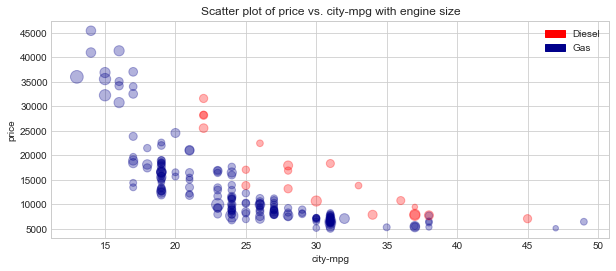

In [35]:
def auto_size(df, plot_cols):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(10, 4))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue', s= .5 * auto_prices['engine-size'], alpha = 0.3)                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red', s= .5 * auto_prices['engine-size'], alpha = 0.3) 
    ax.set_title('Scatter plot of price vs. ' + col + ' with engine size')
    red_patch = mpatches.Patch(color='Red', label='Diesel')   
    blue_patch = mpatches.Patch(color='DarkBlue', label='Gas')
    plt.legend(handles=[red_patch, blue_patch])
    return plot_cols
auto_size(auto_prices, ['city-mpg'])    

Examina la gráfica anterior y observa los diferentes tamaños de marcador. Con marcadores más grandes, establecer la transparencia es más necesario que nunca.

Puedes ver que la diferencia en el tamaño del motor no siempre es evidente en la gráfica anterior. Usar el tamaño del marcador puede ser un poco complicado. Otra opción es usar el cuadrado del valor que se proyecta para determinar el tamaño del marcador. El área del marcador es entonces proporcional al interés, en lugar de un tamaño de marcador menos distinguible.

El siguiente código usa el cuadrado del tamaño del motor para determinar el tamaño del marcador.

'Done'

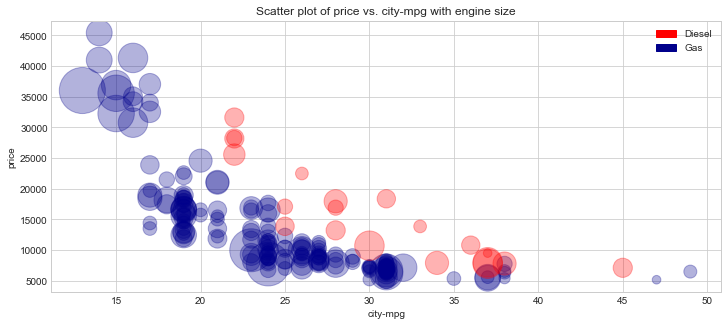

In [37]:
def auto_size_2(df, plot_cols):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(12, 5))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue', s= .02 * auto_prices['engine-size'] * auto_prices['engine-size'], 
                       alpha = 0.3)                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red', s= .02 * auto_prices['engine-size']  * auto_prices['engine-size'], 
                       alpha = 0.3) 
    ax.set_title('Scatter plot of price vs. ' + col + ' with engine size')
    red_patch = mpatches.Patch(color='Red', label='Diesel')   
    blue_patch = mpatches.Patch(color='DarkBlue', label='Gas')
    plt.legend(handles=[red_patch, blue_patch])
    return 'Done'
auto_size_2(auto_prices, ['city-mpg']) 


### Uso de formas de marcador

La forma del marcador se puede usar para proyectar una dimensión adicional. Por lo general, se usan diferentes formas de marcador para indicar las categorías de una variable categórica. Demasiados marcadores similares en un gráfico solo liaran las variables que intentamos mostrar.

'Done'

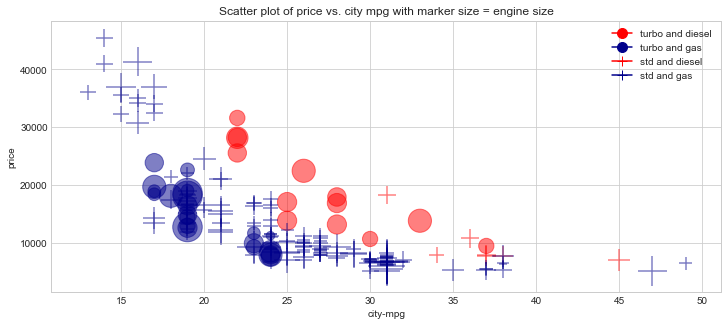

In [40]:
#En este grafico vamos a tener hasta 5 dimensios(variables) en color tenemos diesel o gasolina,
#rl narcador si e turbo o no y el tamaño es el precio del motor


def auto_shape(df):
    import matplotlib.pyplot as plt
    import matplotlib.lines as mlines
    aspiration = ['turbo', 'turbo', 'std', 'std']
    fuel = ['diesel', 'gas', 'diesel', 'gas']
    mrks = ['o', 'o', '+', '+']
    cols = ['Red', 'DarkBlue', 'Red', 'DarkBlue']
    ldg = []
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    for asp, fl, mk, cl in zip(aspiration, fuel, mrks, cols):
        temp = df.ix[(df['aspiration'] == asp) & (df['fuel-type'] == fl)]       
        if temp.shape[0] > 0:                    
            temp.plot(kind = 'scatter', x = 'city-mpg', y = 'price' , ax = ax, color = cl, marker = mk,
                       s= .02 * df['engine-size'] * df['engine-size'], alpha = 0.5)    
        ldg.append(mlines.Line2D([], [], color=cl, marker=mk, markersize=10, 
                                 label=(asp + ' and ' + fl)))    
    ax.set_title('Scatter plot of price vs. city mpg with marker size = engine size')
    plt.legend(handles=ldg)
    return'Done'
auto_shape(auto_prices)

La gráfica anterior proyecta cinco dimensiones en la superficie de una gráfica bidimensional: precio, city-mpg, tamaño del motor, turbo y tipo de combustible. 

Algunas conclusiones que podemos extraer de la tabla anterior incluyen:

- Los automóviles más caros tienen motores de gasoliina de aspiración estándar más grandes.
- La mayoría de los automóviles diesel usan aspiración por turbo y estos tienden a ser más caros.
- Los coches con motor de gasolina con aspiración turbo están en el rango bajo de eficiencia de combustible, pero en el medio del rango de precios.
- Algunos coches de bajo coste tienen grandes motores de gasolina.

### Parametros para plotear histogramas

Hemos utilizado algunas propiedades bastante generales para generar relaciones en nuestro conjunto de datos. Ahora veremos algunas propieades adicionales que tienden a ser más específicas del tipo de gráfico.

Como primer ejemplo, examinaremos el efecto de cambiar el número de bines en un histograma.

Text(0,0.5,'Number of autos')

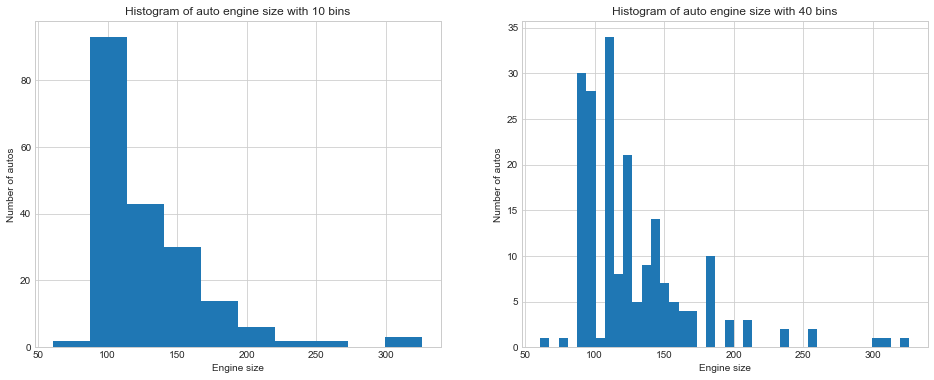

In [41]:
#Dentro de un grafico, tenemos dentro varios gráficos. Es la misma ventana, pero con mas de un gráfico.
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
auto_prices['engine-size'].plot.hist(ax = ax[0]) 
ax[0].set_title('Histogram of auto engine size with 10 bins') # Give the plot a main title
ax[0].set_xlabel('Engine size') # Set text for the x axis
ax[0].set_ylabel('Number of autos')# Set text for y axis
auto_prices['engine-size'].plot.hist(ax = ax[1], bins = 40) 
ax[1].set_title('Histogram of auto engine size with 40 bins') 
ax[1].set_xlabel('Engine size') 
ax[1].set_ylabel('Number of autos')

Ten en cuenta que el histograma con 10 bines proporciona un resultado más uniforme, que puede ser mejor para obtener una impresión general de la distribución. El histograma con 40 bines muestra más detalles, particularmente para los valores atípicos.

### Violin plot dividido

Los diagramas de violín en Seaborn permiten agrupar los datos mediante una variable categórica binaria. En el código siguiente el argumento ``hue`` se usa para mostrar los KDE de los coches estándar y de aspiración turbo, agrupados por la variable de eje ``x`` del tipo de combustible. La gráfica resultante muestra tres dimensiones: precio, tipo de combustible y aspiración.

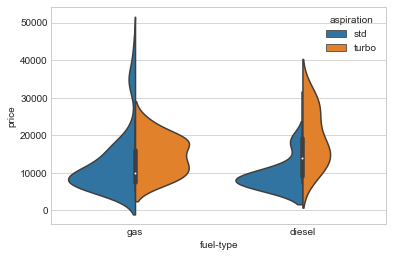

In [42]:
import seaborn as sns
sns.set_style("whitegrid")
sns.violinplot(data = auto_prices, x = 'fuel-type', y = 'price', hue="aspiration",  split=True)

Del plot anterior, podemos ver que los coches con motor de gasolina de aspiración estándar tienen la más amplia gama de precios. También podemos ver que los coches diesel tienden a ser más caros. Finalmente, los automóviles a gasolina y diesel con aspiración estándar tienen precios sesgados hacia el lado inferior.

### Boxplot propiedades

Usando Seaborn podemos agregar datos de grupos en los boxplots usndo ``hue``, de forma muy parecida a como lo hicimos con violin plots.

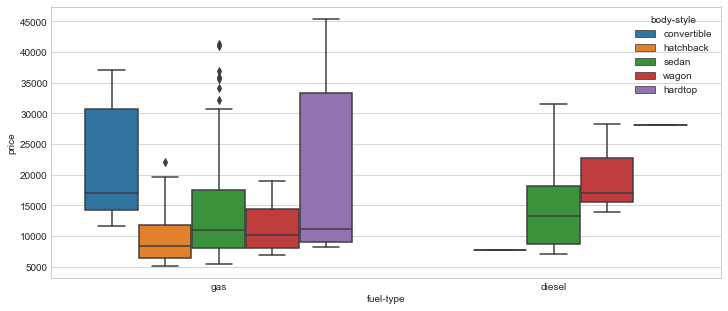

In [43]:
fig = plt.figure(figsize=(12, 5)) # definimos area de plotting
sns.set_style("whitegrid")
sns.boxplot(data = auto_prices, x = 'fuel-type', y = 'price', hue="body-style")

Agregar el color asthetic ha resaltado algunas relaciones complejas en nuestro conjunto de datos. Examine la trama, notando varias relaciones interesantes, incluyendo:

- Los coches con techo (hardtop) de gasolina tienen la más amplia gama de precios, seguidos por los descapotables de gasolina.
- Hay pocos estilos de carrocería disponibles para los automóviles diesel.
- Los hatchbacks de gasolina son generalmente los coches de menor coste, seguidos por los sedanes de gasolina y diesel.
- Hay dos autos diesel con tipos de cuerpo únicos.

## Multi-axis y Facet Plots

Hemos explorado los tipos de plot básicos y el uso de sus propiedades para proyectar múltiples dimensiones. Ahora investigaremos el uso de gráficas de múltiples ejes. Los diagramas de ejes múltiples usan una matriz de ejes para mostrar las relaciones en un conjunto de datos. Los diagramas de ejes de plot múltiples incluyen matrices de scatter plots y una técnica conocida como ** faceting **. Faceting implica el uso de valores de variables categóricas o numéricas para crear un conjunto  de gráficos relacionadas.

### Pair plot con densidad marginal

Un tipo de diagrama de ejes múltiples simple es un scatter plot con la densidad marginal de cada dimension que se muestra a lo largo del eje horizontal o vertical.

Usamos el método ``jointplot`` de Seaborn para crear una gráfica así. Las columnas que se trazarán en los ejes x e y. El argumento de transparencia ``alpha`` se especifica para tratar el manejar el sobreploteado.

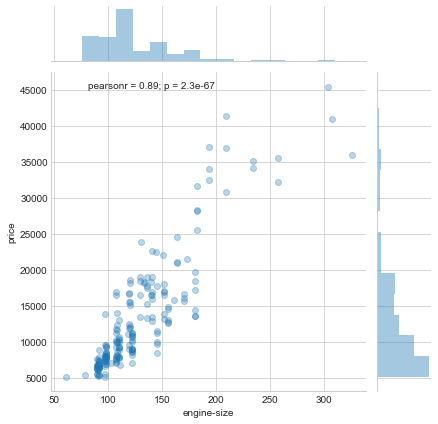

In [44]:
sns.set_style("whitegrid")
sns.jointplot('engine-size', 'price', data = auto_prices, alpha = 0.3)

La gráfica anterior muestra la relación entre el precio y el tamaño del motor. La distribución marginal del precio se muestra a lo largo del eje y y la distribución marginal del tamaño del motor se muestra a lo largo del eje x.

### Pair wise plots

Los pair wise plots, también conocidos como matrices de plots, nos permiten ver múltiples dimensiones de un conjunto de datos en una plot. Se muestra un scatter plot de cada variable frente a todas las otras variables, ordenadas en una matriz. Se puede mostrar otro tipo de diagrama, como uno de KDE, para cada par de variables. Se pueden poner diferentes tipos de gráficos a lo largo de la diagonal de la matriz.

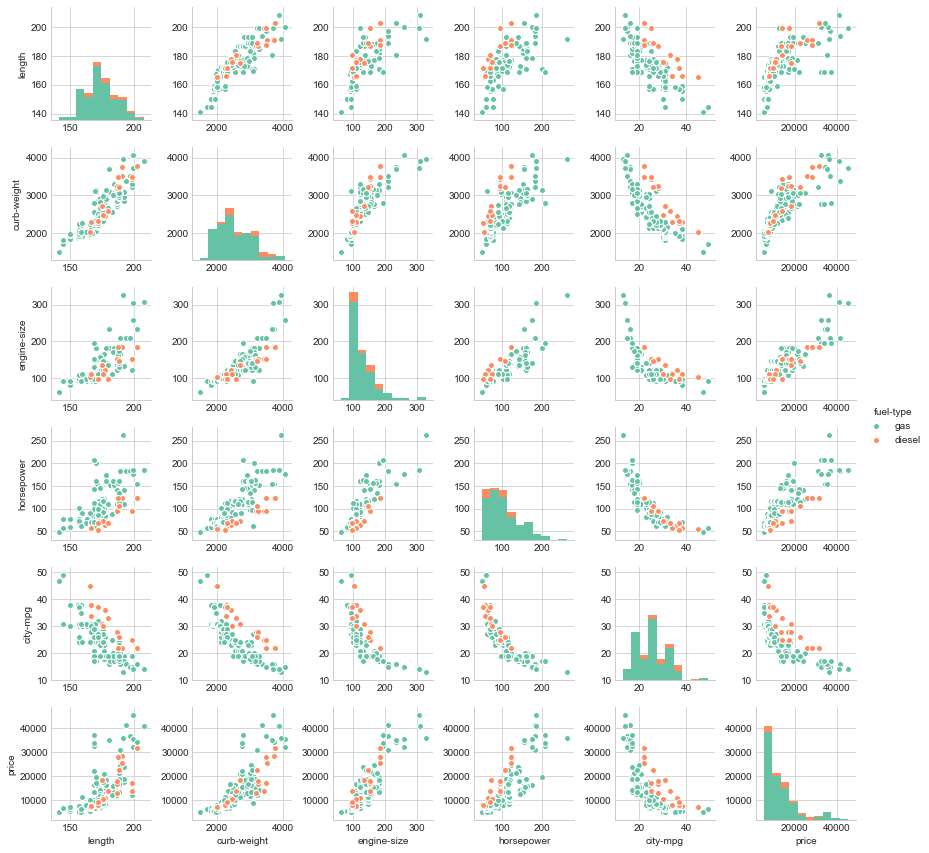

In [45]:
num_cols = ["length", "curb-weight", "engine-size", "horsepower", "city-mpg", "price", "fuel-type"] 
sns.pairplot(auto_prices[num_cols], hue='fuel-type', palette="Set2", size=2)

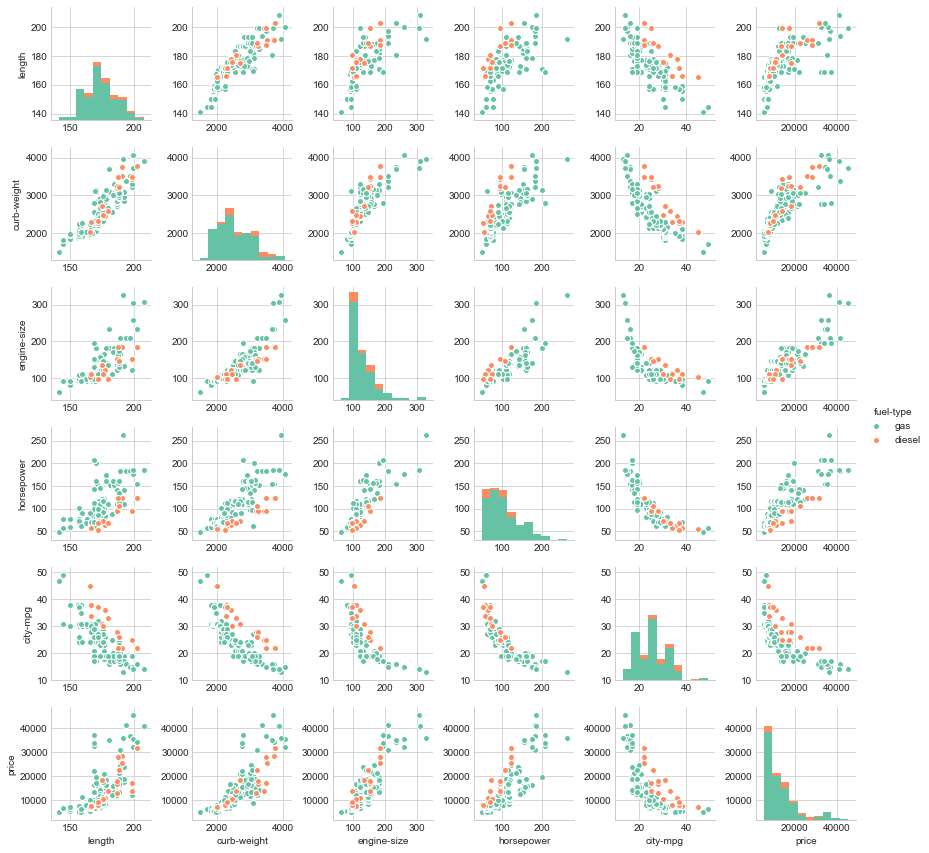

In [51]:
#Como guardar figuras
#El dpi es im portante, si lo pones más pequeño, sale kk
fig = plt.figure(figsize=(12,12))
num_cols = ["length", "curb-weight", "engine-size", "horsepower", "city-mpg", "price", "fuel-type"] 
sns.pairplot(auto_prices[num_cols], hue='fuel-type', palette="Set2", size=2)
plt.savefig('mypairplot.png', dpi= 300, format='png')

Hay una gran cantidad de información sobre el plot anterior.

- Hay plots de KDE agrupados por tipo de combustible para cada una de las variables especificadas.
- Los coches con mayor longitud, peso, tamaño del motor y potencia de caballos son más caros.
- Los automóviles con mayor peso tienden a ser más largos y tienen motores más grandes.
- Coches más largos y pesados, tienen motores más grandes o más caballos de potencia y son  menos eficientes.

### Plots en múltiples ejes

Vamos a crear plots en una figura con subplots que nos permitan generar una figura mas completa. En este caso crearemos una figura de 2x2 que contiene histogramas de datos.

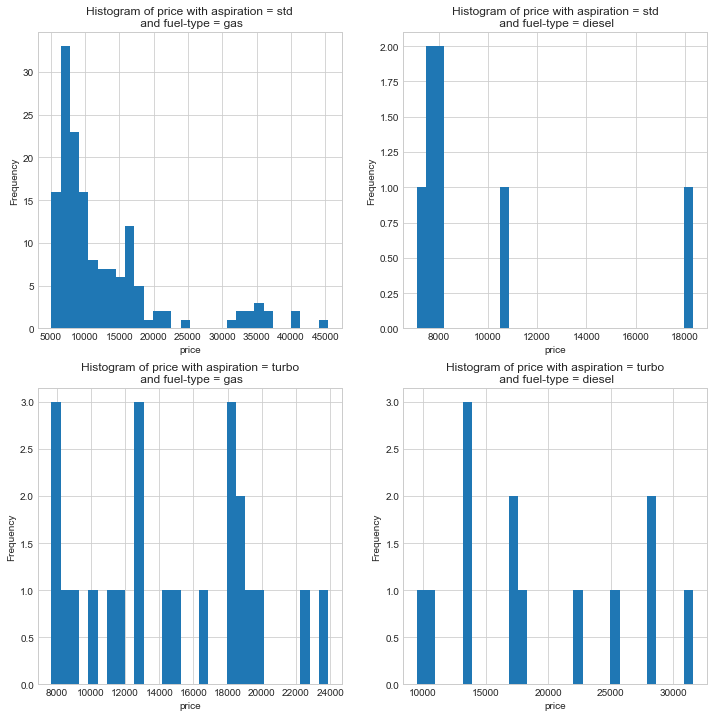

In [46]:
def plot_multi(df, col, xcol, ycol):
    fig, ax = plt.subplots(2, 2, figsize = (12, 12))
    xcols = df[xcol].unique()
    ycols = df[ycol].unique()
    for i, xcl in enumerate(xcols):
        for j, ycl in enumerate(ycols):
            auto_prices.ix[(df[xcol] == xcl) & (df[ycol] == ycl), col].plot.hist(ax = ax[i,j], bins = 30)
            ax[i,j].set_title('Histogram of ' + col + ' with ' + xcol + ' = ' + xcl + '\n and ' + ycol + ' = ' + ycl) 
            ax[i,j].set_xlabel(col) 
plot_multi(auto_prices, 'price', 'aspiration', 'fuel-type')            

De estos plots podemos observar lo siguiente:
 - El precio de los coches con aspiracion estandar esta sesgado hacia el parte inferior.  
 - El precio de los coches con turbo es bastante uniforme.

### Facet plots

En el ejemplo anterior creamos una figura con plots de 2x2. Seaborn nos permite hacer lo mismo con mucho menos codigo pero con algo menos de control.

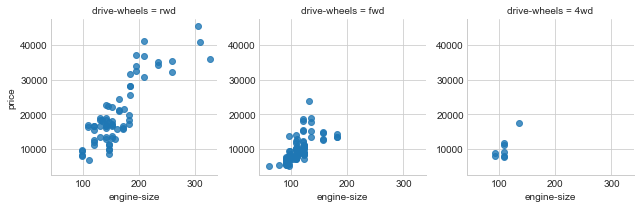

In [47]:
g = sns.FacetGrid(auto_prices, col="drive-wheels")
g.map(sns.regplot, "engine-size", "price", fit_reg = False)

# Ejercicios

1 - Muestra en un scatter plot la relacion existente entre los caballos de un coche y el precio. Existe alguna relacion? Si crees que si, realiza un test comparativo de precios estableciendo dos grupos (por debajo y encima de la mediana del numero de caballos).

2 - Muestra en un boxplot la distribucion de precios de los coches con motor en la parte delantera y trasera.

3 - Agrega la dimension caballos y muestra un plot las dimensiones. Localizacion del motor, caballos y precio.

4 - Plotea la relacion del precio, los caballos para las diferentes marcas existentes. Puedes jugar con la transparencia y el tamanio del marcador para representar mejor tus resultados.

5 - Muestra la relacion de los km en autopista y el peso para cada una de las marcas de coches.